# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [63]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

## Dataset
---

In [64]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [66]:
data.describe()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


## Vizuelizacija podataka
---


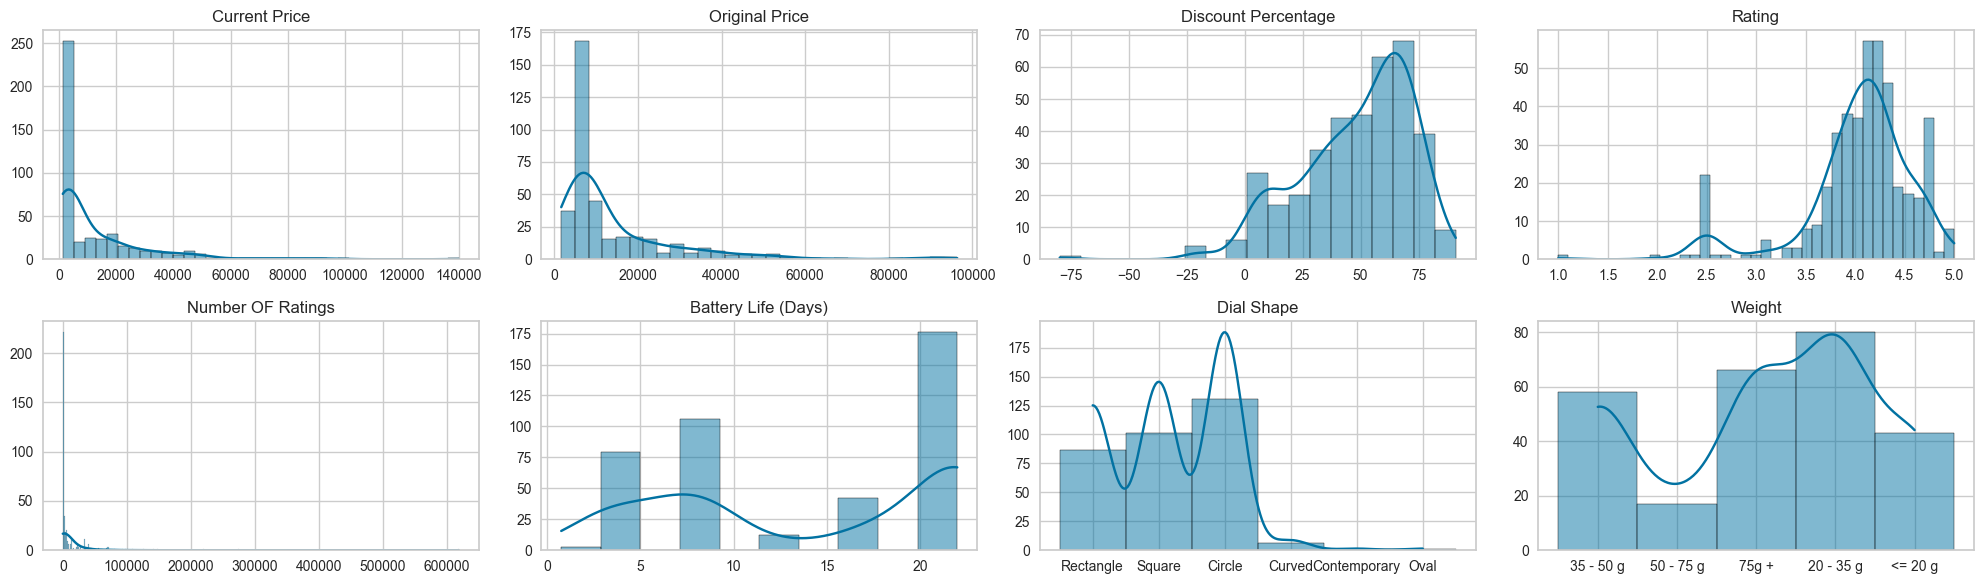

In [67]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

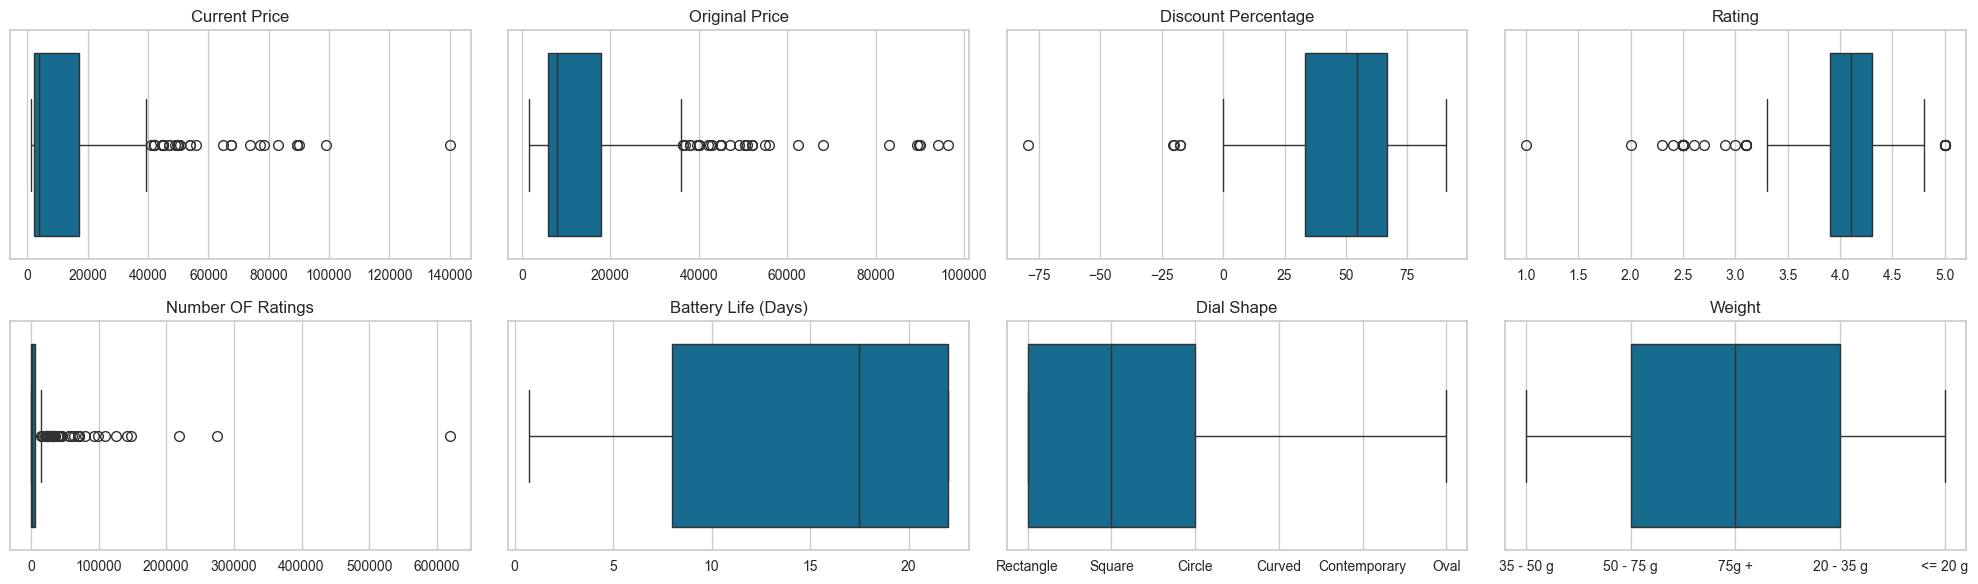

In [68]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


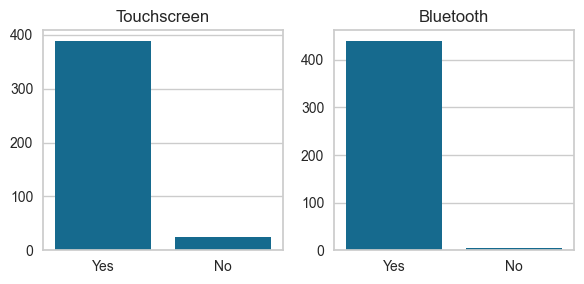

In [69]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

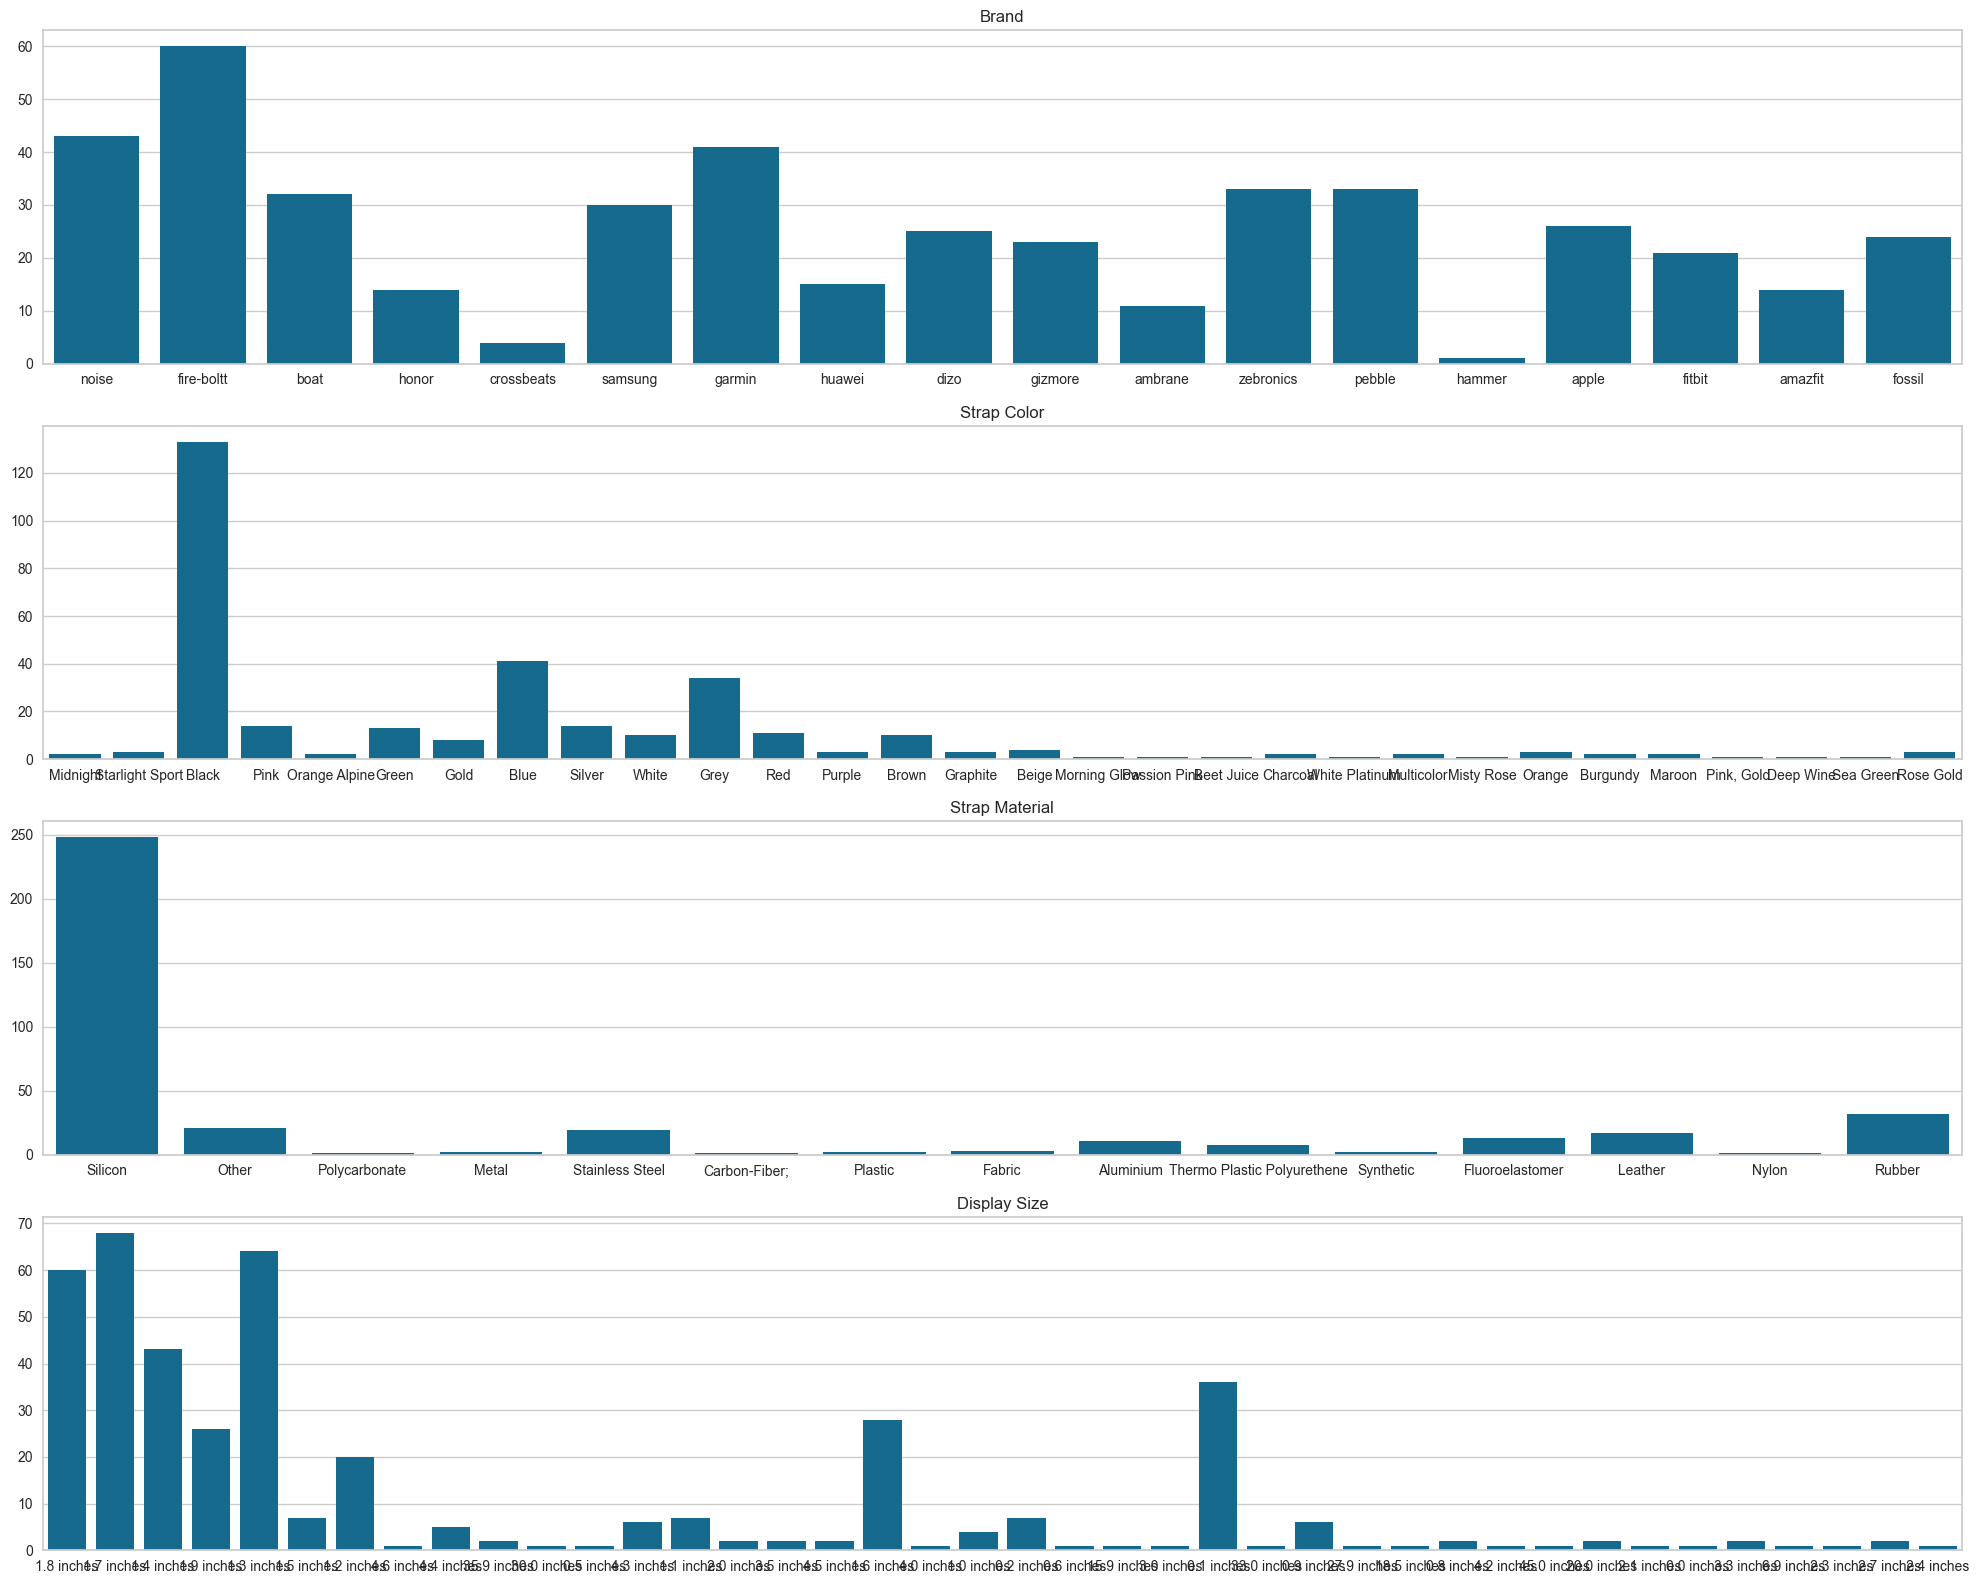

In [70]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

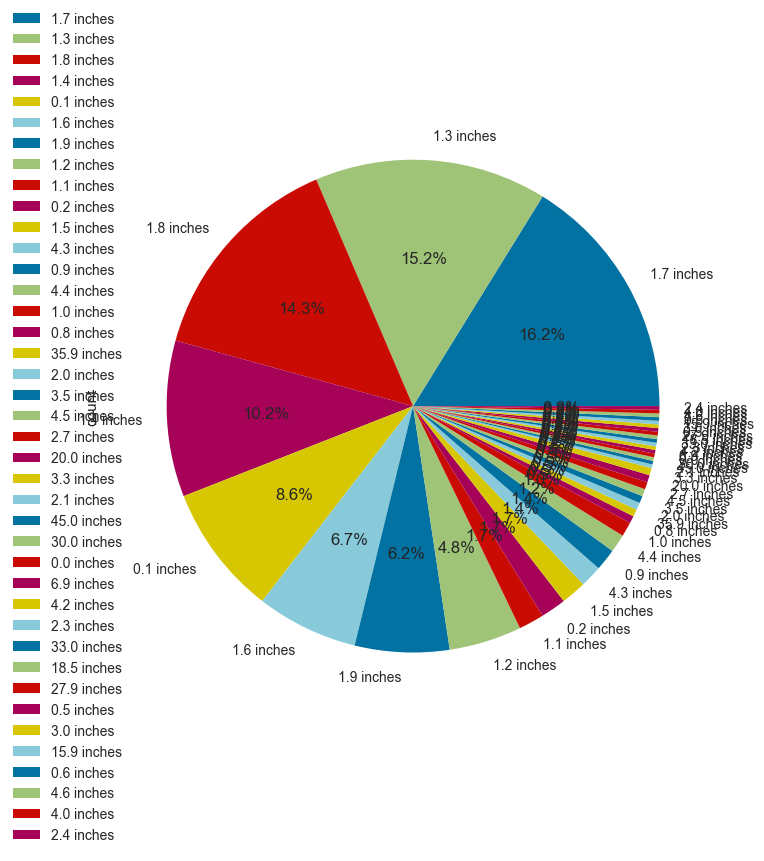

In [71]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc="upper left")
plt.show()

## Transformacija podataka
----

Provera i uklanjenje duplikata:

In [72]:
print("Number Of Rows In The Original DataFrame:", len(data))

data = data.drop_duplicates()

print("Number Of Rows After Deduping:", len(data))

data1 = data1.drop_duplicates()

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


### Pronalazenje outliera

 Standard Deviation Method

In [73]:

columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")



Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


Interquartile Range Method

In [74]:

for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


Logaritam za ublazavanje outliera

In [75]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]

In [76]:
for column in columns:
    data_mean, data_std = mean(data1[column]), std(data1[column])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data1[column] if x < lower or x > upper]
    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


Brisanje outliera

In [77]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 40000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
5,noise,1499.0,3999.0,62.515629,4.0,32704.0,NSW-05,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [78]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


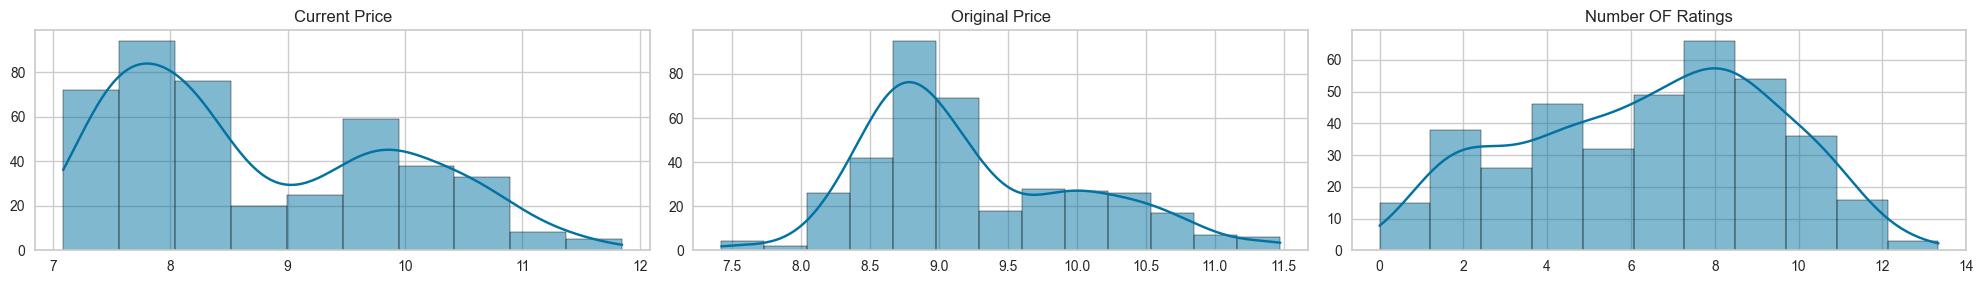

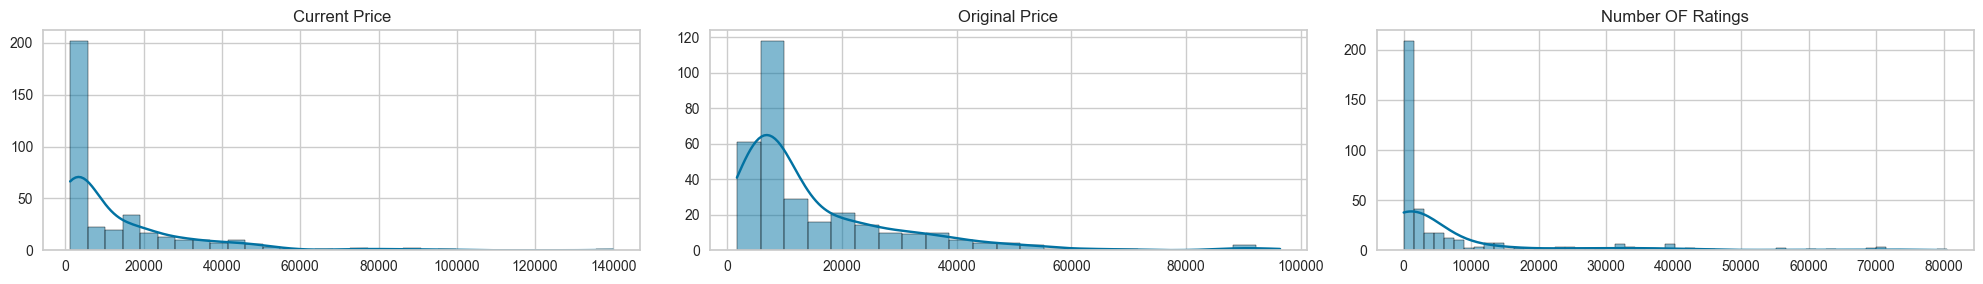

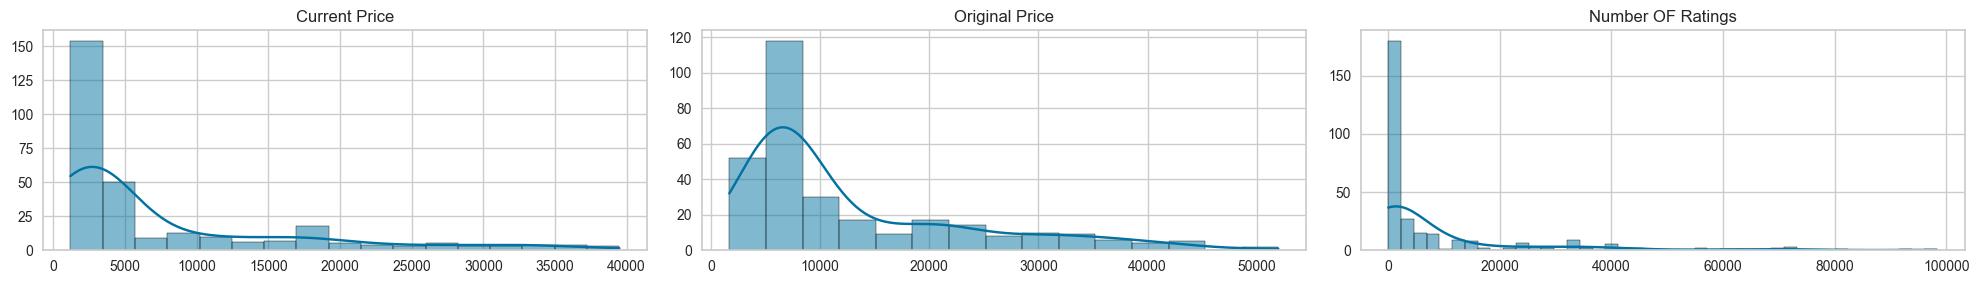

In [79]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Iz prethodnih grafika zakljucujemo da je najbolji izbor za resavanje outlier-a koriscenje logaritma


Sredjivanje negativnih vrednosti u koloni **Discount Percentage**

In [80]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]

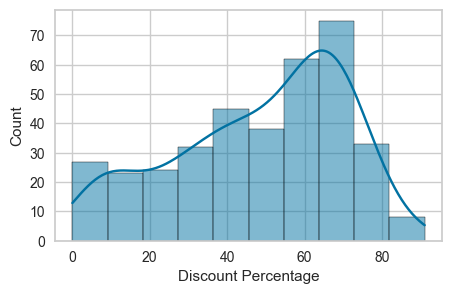

In [81]:
plt.figure(figsize=(5, 3))
sns.histplot(x="Discount Percentage", data=data1,  kde=True)
plt.show()

## Missing values

In [82]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    # count number of rows with missing values
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


,Count,%
Brand,0.0,0.00
Current Price,10.0,2.27
Original Price,73.0,16.59
Discount Percentage,73.0,16.59
Rating,6.0,1.36
Number OF Ratings,59.0,13.41
Model Name,33.0,7.50
Dial Shape,113.0,25.68
Strap Color,113.0,25.68
Strap Material,66.0,15.00


<Axes: >

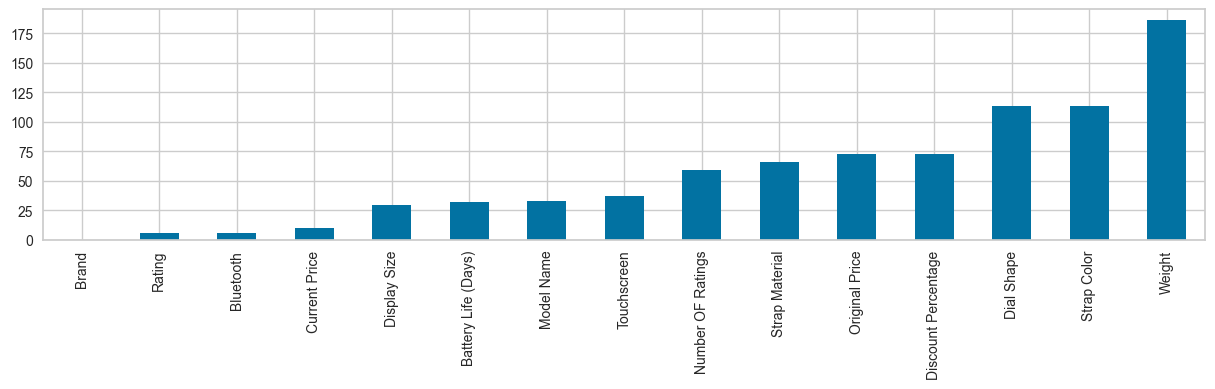

In [83]:
nan_count.plot(kind='bar', figsize=(15, 3))

In [84]:

scale_mapper = {
    '75g +': 1,
    '50 - 75 g': 2,
    '35 - 50 g': 3,
    '20 - 35 g': 4,
    '<= 20 g': 5 }

data1["Weight"] = data["Weight"].replace(scale_mapper)

scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)


data1.head()




,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8 inches,2.0
2,boat,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7 inches,3.0
3,fire-boltt,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8 inches,1.0
4,noise,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7 inches,3.0


In [85]:
data1["Display Size"] = data["Display Size"].str.replace(" inches", "")

data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float)
data1["Display Size"] = data1["Display Size"].astype(float)

data1["Display Size"]
data1["Display Size"].isnull().sum()

30

In [86]:

list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 1.5, 1.2 , 0.1]
uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

print(len(data1["Display Size"]))
data1["Display Size"].isnull().sum()


440


30

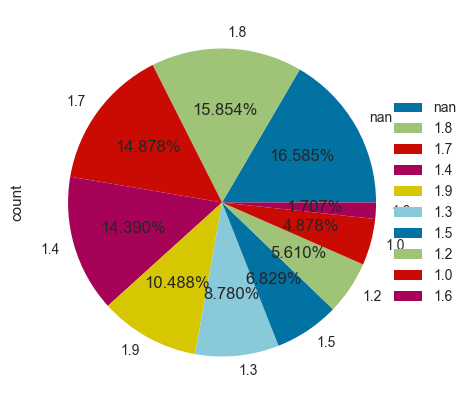

Display Size
1.0    68
1.7    65
1.3    61
1.8    59
1.4    43
0.1    36
1.6    28
1.9    23
1.2    20
1.5     7
Name: count, dtype: int64

In [87]:
plt.figure(figsize=(5, 5))
pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
pie.figure.legend(loc='right')
plt.show()

data1["Display Size"].unique()
data1["Display Size"].value_counts()

In [88]:
data1.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8,2.0
2,boat,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7,3.0
3,fire-boltt,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8,1.0
4,noise,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7,3.0


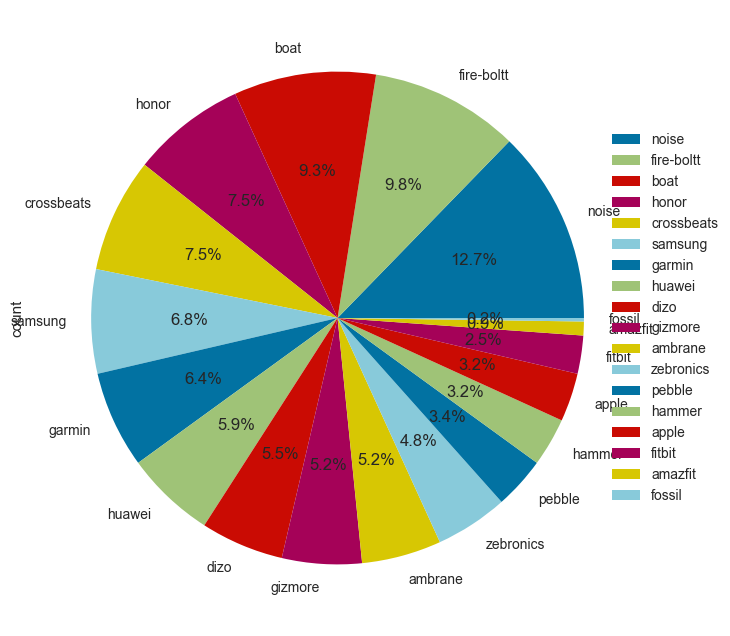

In [89]:
plt.figure(figsize=(8, 8))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
plt.show()

Podela brendova u 3 vrste prema populatnosti:  
1) top **15% - 7.5%**
2) middle **6.8% - 5.2%**
3) low **4.8% - 0%** 

In [91]:
scale_mapper = {
    'noise': 'top',
    'fire-boltt': 'top',
    'boat': 'top',
    'honor': 'top',
    'crossbeats': 'top',
    'samsung': 'middle',
    'garmin': 'middle',
    'huawei': 'middle',
    'dizo': 'middle',
    'gizmore': 'middle',
    'ambrane': 'middle',
    'zebronics': 'low',
    'pebble': 'low',
    'hammer': 'low',
    'apple': 'low',
    'fitbit': 'low',
    'amazfit': 'low',
    'fossil': 'low'
    }
data1["Brand"] = data["Brand"].replace(scale_mapper)


In [92]:
data1.rename(columns={'Brand': 'b'}, inplace=True)

In [93]:

data1 = pd.get_dummies(data=data1, columns=['b'])
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,b_low,b_middle,b_top
0,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0,False,False,True
1,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8,2.0,False,False,True
2,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7,3.0,False,False,True
3,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8,1.0,False,False,True
4,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7,3.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,True,22.0,True,1.3,NaN,False,False,True
446,8.216088,9.210240,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,True,8.0,True,0.1,NaN,False,False,True
447,8.699348,9.104869,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,True,22.0,True,1.3,NaN,False,False,True
448,8.070906,8.987072,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,True,22.0,True,0.1,NaN,False,False,True


In [103]:
print(data["Strap Material"].value_counts())

scale_mapper = {
    'Silicon': 'Silicon',
    'Other': 'Other',
    'Rubber': 'Rubber',
    'Fluoroelastomer': 'Rubber',
    'Leather': 'Leather',
    'Metal': 'Metal',  
    'Stainless Steel': 'Metal',
    'Aluminium': 'Metal',
    'Polycarbonate': 'Other',
    'Carbon-Fiber;': 'Other',
    'Plastic': 'Other',
    'Fabric': 'Other',
    'Thermo Plastic Polyurethene': 'Other',
    'Synthetic': 'Other',
    'Nylon': 'Other'
    }
data1["Strap Material"] = data["Strap Material"].replace(scale_mapper)
print("-----------------")
print(data1["Strap Material"].value_counts())


Strap Material
Silicon                        241
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64
Strap Material
Silicon    241
Rubber      45
Other       39
Metal       32
Leather     17
Name: count, dtype: int64


In [107]:
scale_mapper = {
    'Circle': 'Circle',
    'Square': 'Rectangle',
    'Rectangle': 'Rectangle',
    'Curved': 'Circle',
    'Contemporary': 'Circle',
    'Oval': 'Circle',
    }
data1["Dial Shape"] = data["Dial Shape"].replace(scale_mapper)
print(data1["Dial Shape"].value_counts())

Dial Shape
Rectangle    188
Circle       139
Name: count, dtype: int64


In [113]:
print(data['Strap Color'].value_counts())
color_mapping = {
    'Midnight': 'Black',
    'Starlight Sport': 'White',
    'Black': 'Black',
    'Pink': 'Pink',
    'Orange Alpine': 'Orange',
    'Green': 'Green',
    'Gold': 'Gold',
    'Blue': 'Blue',
    'Silver': 'Grey',
    'White': 'White',
    'Grey': 'Grey',
    'Red': 'Red',
    'Purple': 'Purple',
    'Brown': 'Brown',
    'Graphite': 'Grey',
    'Beige': 'Brown',
    'Morning Glow': 'Orange',
    'Passion Pink': 'Pink',
    'Beet Juice': 'Purple',
    'Charcoal': 'Grey',
    'White Platinum': 'White',
    'Multicolor': 'Multicolor',
    'Misty Rose': 'Pink',
    'Orange': 'Orange',
    'Burgundy': 'Red',
    'Maroon': 'Red',
    'Pink, Gold': 'Pink',
    'Deep Wine': 'Red',
    'Sea Green': 'Green',
    'Rose Gold': 'Gold'
}
data1["Strap Color"] = data["Strap Color"].replace(color_mapping)
data1['Strap Color'].value_counts()



Strap Color
Black              133
Blue                41
Grey                34
Pink                14
Silver              14
Green               13
Red                 11
White               10
Brown               10
Gold                 8
Beige                4
Graphite             3
Orange               3
Starlight Sport      3
Rose Gold            3
Purple               3
Charcoal             2
Multicolor           2
Orange Alpine        2
Burgundy             2
Maroon               2
Midnight             2
Morning Glow         1
Passion Pink         1
Beet Juice           1
White Platinum       1
Misty Rose           1
Pink, Gold           1
Deep Wine            1
Sea Green            1
Name: count, dtype: int64


Strap Color
Black         135
Grey           53
Blue           41
Pink           17
Red            16
White          14
Green          14
Brown          14
Gold           11
Orange          6
Purple          4
Multicolor      2
Name: count, dtype: int64

In [117]:
#data1 = pd.get_dummies(data=data1, columns=["Strap Color", "Strap Material"])
data1 = pd.get_dummies(data=data1, columns=['Dial Shape'],drop_first=True )
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Touchscreen,Battery Life (Days),Bluetooth,Display Size,...,Strap Color_Pink,Strap Color_Purple,Strap Color_Red,Strap Color_White,Strap Material_Leather,Strap Material_Metal,Strap Material_Other,Strap Material_Rubber,Strap Material_Silicon,Dial Shape_Rectangle
0,11.326475,11.406453,7.686318,4.0,4.174387,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,8.0,True,NaN,...,False,False,False,False,False,False,False,False,False,False
1,8.242493,9.740910,77.651627,4.3,9.942131,BSW046,True,3.5,True,1.8,...,False,False,False,False,False,False,False,False,True,False
2,7.600402,8.985946,74.981227,3.8,9.986173,Wave Call,True,8.0,True,1.7,...,False,False,False,False,False,False,False,False,True,False
3,7.494986,9.903438,91.004550,4.3,9.491300,BSW053,True,3.5,True,1.8,...,False,False,False,False,False,False,False,False,True,False
4,7.377134,8.516993,68.013603,4.1,9.539716,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,True,8.0,True,1.7,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.5,NaN,bsw003,True,22.0,True,1.3,...,False,False,False,False,False,False,False,False,True,False
446,8.216088,9.210240,62.996300,NaN,NaN,beast pro,True,8.0,True,0.1,...,False,False,False,False,False,False,False,False,True,True
447,8.699348,9.104869,33.337037,2.5,NaN,bsw003,True,22.0,True,1.3,...,False,False,False,False,False,False,False,False,True,False
448,8.070906,8.987072,59.994999,NaN,NaN,call 2,True,22.0,True,0.1,...,False,False,False,False,False,False,False,False,True,True


In [118]:
#data1 = data1.drop(columns=['Weight', "Strap Color", "Dial Shape", "Model Name", "Strap Material" ])
data1 = data1.drop(columns=['Weight',  "Model Name" ])

data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,b_low,...,Strap Color_Pink,Strap Color_Purple,Strap Color_Red,Strap Color_White,Strap Material_Leather,Strap Material_Metal,Strap Material_Other,Strap Material_Rubber,Strap Material_Silicon,Dial Shape_Rectangle
0,11.326475,11.406453,7.686318,4.0,4.174387,NaN,8.0,True,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,8.242493,9.740910,77.651627,4.3,9.942131,True,3.5,True,1.8,False,...,False,False,False,False,False,False,False,False,True,False
2,7.600402,8.985946,74.981227,3.8,9.986173,True,8.0,True,1.7,False,...,False,False,False,False,False,False,False,False,True,False
3,7.494986,9.903438,91.004550,4.3,9.491300,True,3.5,True,1.8,False,...,False,False,False,False,False,False,False,False,True,False
4,7.377134,8.516993,68.013603,4.1,9.539716,True,8.0,True,1.7,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.5,NaN,True,22.0,True,1.3,False,...,False,False,False,False,False,False,False,False,True,False
446,8.216088,9.210240,62.996300,NaN,NaN,True,8.0,True,0.1,False,...,False,False,False,False,False,False,False,False,True,True
447,8.699348,9.104869,33.337037,2.5,NaN,True,22.0,True,1.3,False,...,False,False,False,False,False,False,False,False,True,False
448,8.070906,8.987072,59.994999,NaN,NaN,True,22.0,True,0.1,False,...,False,False,False,False,False,False,False,False,True,True


### Filling missing values


Strategije popunjavanja:
- mean
- median
- mode
- constant

In [120]:
data1.fillna(data1.mean(),inplace=True)
data1.isna().sum()


Current Price             0
Original Price            0
Discount Percentage       0
Rating                    0
Number OF Ratings         0
Touchscreen               0
Battery Life (Days)       0
Bluetooth                 0
Display Size              0
b_low                     0
b_middle                  0
b_top                     0
Strap Color_Black         0
Strap Color_Blue          0
Strap Color_Brown         0
Strap Color_Gold          0
Strap Color_Green         0
Strap Color_Grey          0
Strap Color_Multicolor    0
Strap Color_Orange        0
Strap Color_Pink          0
Strap Color_Purple        0
Strap Color_Red           0
Strap Color_White         0
Strap Material_Leather    0
Strap Material_Metal      0
Strap Material_Other      0
Strap Material_Rubber     0
Strap Material_Silicon    0
Dial Shape_Rectangle      0
dtype: int64

In [121]:
data.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              33
Dial Shape             113
Strap Color            113
Strap Material          66
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [122]:
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,b_low,...,Strap Color_Pink,Strap Color_Purple,Strap Color_Red,Strap Color_White,Strap Material_Leather,Strap Material_Metal,Strap Material_Other,Strap Material_Rubber,Strap Material_Silicon,Dial Shape_Rectangle
0,11.326475,11.406453,7.686318,4.000000,4.174387,0.940447,8.0,True,1.343415,False,...,False,False,False,False,False,False,False,False,False,False
1,8.242493,9.740910,77.651627,4.300000,9.942131,True,3.5,True,1.800000,False,...,False,False,False,False,False,False,False,False,True,False
2,7.600402,8.985946,74.981227,3.800000,9.986173,True,8.0,True,1.700000,False,...,False,False,False,False,False,False,False,False,True,False
3,7.494986,9.903438,91.004550,4.300000,9.491300,True,3.5,True,1.800000,False,...,False,False,False,False,False,False,False,False,True,False
4,7.377134,8.516993,68.013603,4.100000,9.539716,True,8.0,True,1.700000,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,8.699348,9.104869,33.337037,2.500000,6.445428,True,22.0,True,1.300000,False,...,False,False,False,False,False,False,False,False,True,False
446,8.216088,9.210240,62.996300,4.032949,6.445428,True,8.0,True,0.100000,False,...,False,False,False,False,False,False,False,False,True,True
447,8.699348,9.104869,33.337037,2.500000,6.445428,True,22.0,True,1.300000,False,...,False,False,False,False,False,False,False,False,True,False
448,8.070906,8.987072,59.994999,4.032949,6.445428,True,22.0,True,0.100000,False,...,False,False,False,False,False,False,False,False,True,True


## Data corelation

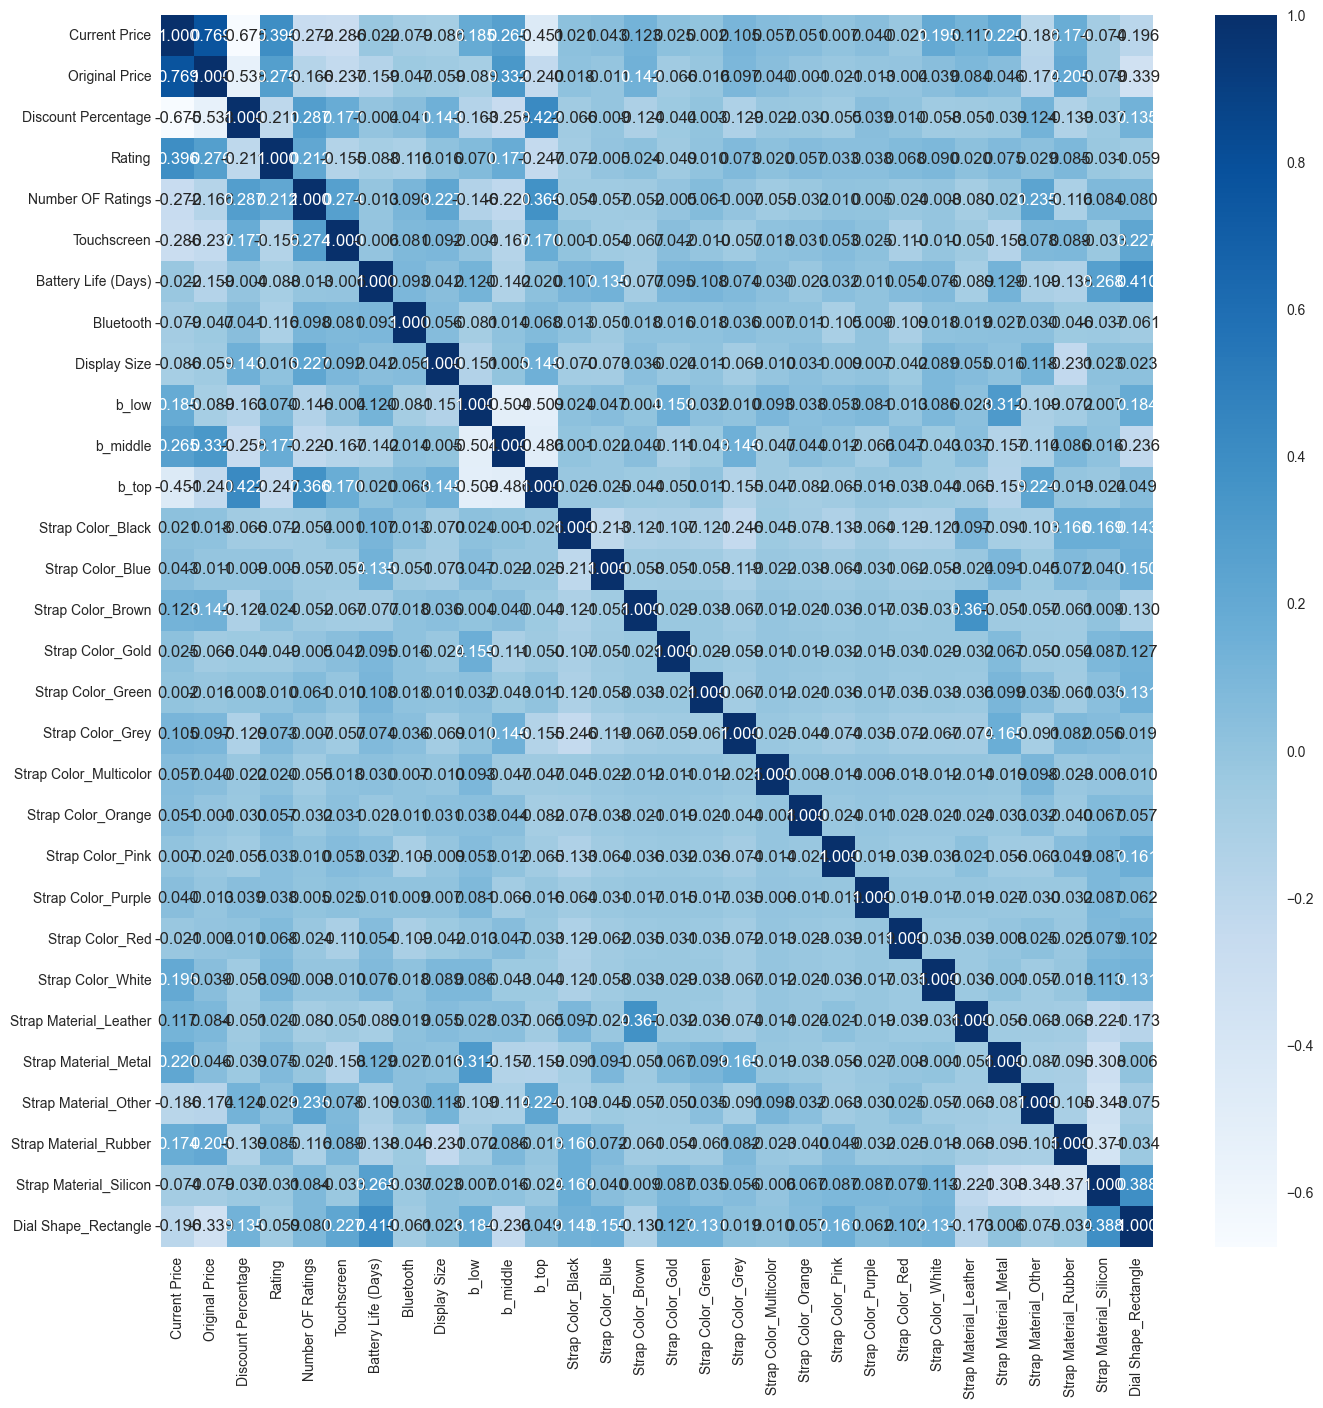

In [123]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

## Standardize data

In [128]:

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)

X = features_std

## Primena algoritama


helper funkcije

In [125]:
def printResult(y_value, X_value, claster_center):
    unique_labels = np.unique(y_value)
    for label in zip(unique_labels):
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], s=25, label=f'Cluster {label}')

    if(claster_center is not None):
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

    plt.title(f'Product Categorization with MeanShift')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printCenters(claster_center):
    plt.figure(figsize=(20, 15))

    for i in range(len(claster_center)):
        plt.subplot(len(claster_center), 1, i + 1)
        plt.bar(range(X.shape[1]), claster_center[i], tick_label=[f'{j[0:8]}' for j in data1.columns])
        plt.title(f'Cluster {i + 1} - Feature Importance')

    plt.tight_layout()
    plt.show()

### Elbow Method

Elbow Method to determine the number of clusters to be formed:


d:\V godina\Masinsko ucenje\Prvi projekat\ML-P1-Classification\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\V godina\Masinsko ucenje\Prvi projekat\ML-P1-Classification\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\V godina\Masinsko ucenje\Prvi projekat\ML-P1-Classification\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\V godina\Masinsko ucenje\Prvi projekat\ML-P1-Classification\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\V godina\Masinsko ucenje\Prvi projekat\ML-P

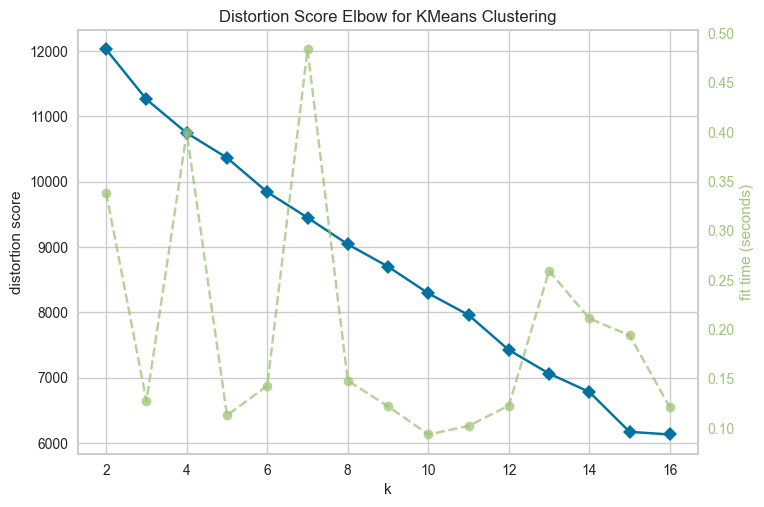

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=16)
Elbow_M.fit(features_std)
Elbow_M.show()


### K means

In [130]:

kmeans = KMeans(n_clusters=Elbow_M.elbow_value_, n_init=50, init='k-means++', max_iter=500).fit(X)

pred_kmeans = kmeans.predict(X)

claster_center_kmeans = kmeans.cluster_centers_

printResult(pred_kmeans, X, claster_center_kmeans)
printCenters(claster_center_kmeans)

InvalidParameterError: The 'n_clusters' parameter of KMeans must be an int in the range [1, inf). Got None instead.

### MeanShift


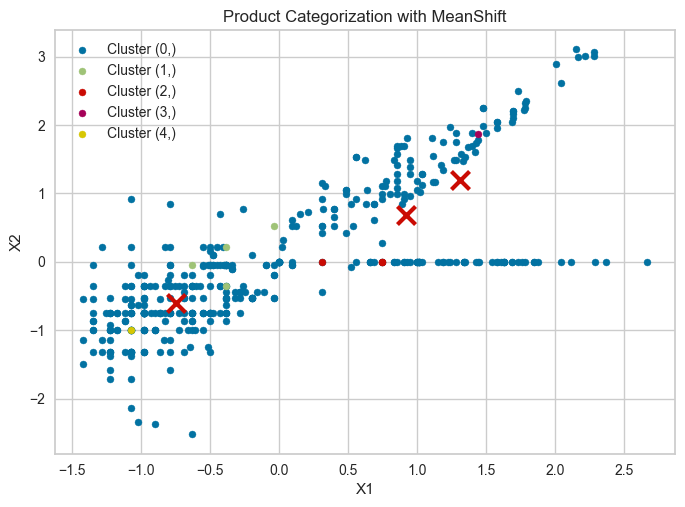

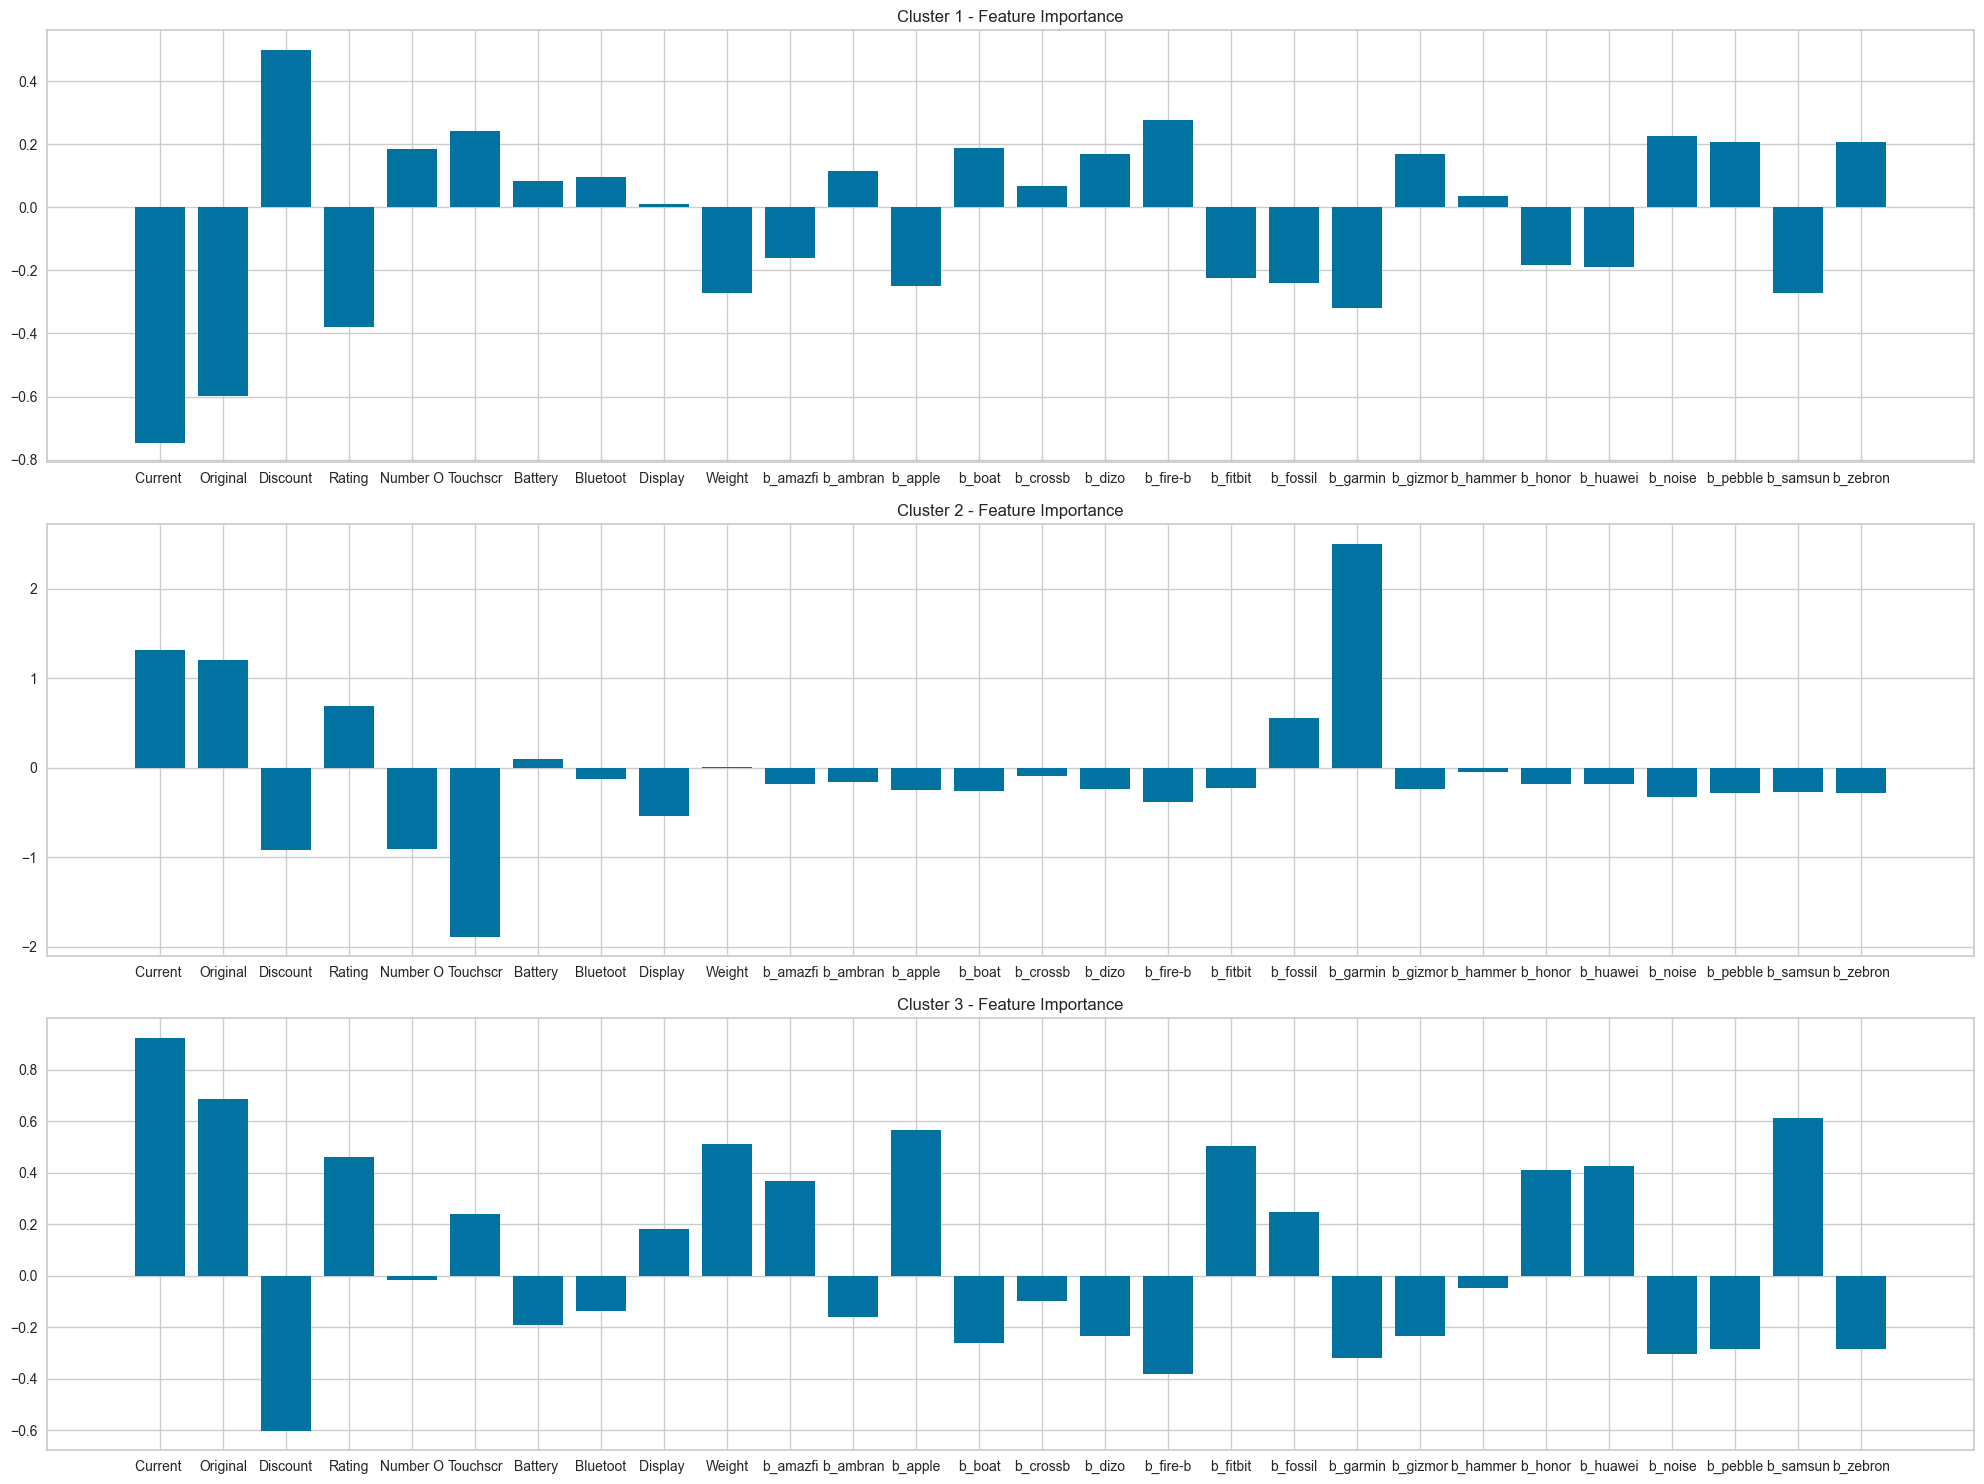

In [ ]:

mean_shift = MeanShift().fit(X)

pred_means = mean_shift.predict(X)

# Izračunavanje središta klastera
claster_center_mean_s = kmeans.cluster_centers_

printResult(pred_means, X, claster_center_mean_s)

printCenters(claster_center_mean_s)
 


### DBSCAN

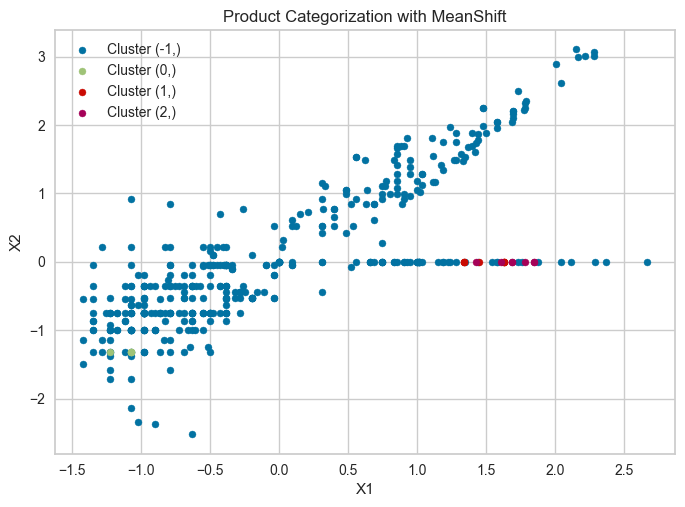

In [ ]:


dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(X)

printResult(pred_dbscan, X, None)


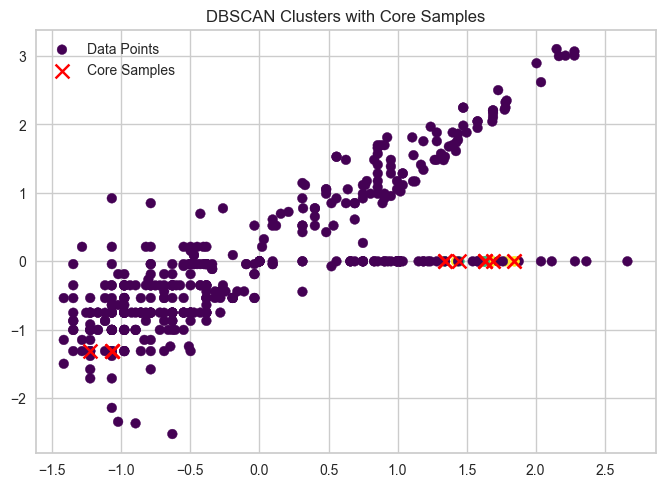

In [ ]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

# Extract core samples
core_samples = X[core_samples_mask]


plt.scatter(X[:, 0], X[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()